<a href="https://colab.research.google.com/github/soumytiwari/House_predicto/blob/main/House_predicto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prdiction Regression Project

## Project Goal

Predict the price of a house by its features. If you are a buyer or seller of the house but you don't know the exact price of the house, so supervised learning regression algorithms can help you to predict the price of the house just providing features of the target house.

## import libraries / modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

## Load Dataset

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

# print("train: ", train_data)
# print("test: ", test_data)

print("Shape of test data: ", test_data.shape)          # output: (no. of data, no. of features)
print("Shape of train data: ", train_data.shape)

Shape of test data:  (1459, 80)
Shape of train data:  (1460, 81)


can also read from any type of data like, sql through pandas.
Can refer to the link: https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-pandas?view=sql-server-ver15

In [ ]:
pd.set_option("display.max_columns", None)        # this set_options max row / columns let's us see all the rows/columns without hide
pd.set_option("display.max_rows", None)          # None can be any number also, indicating 'x' number of rows or column

In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Know your data
#### some important features among all
- neighborhood
- overallqual
- overallcond
- yearbuilt
- foundation
- electrical
- kitchenqual
- garagetype
- garagefinish
- fence

will use this while converting into numerical format / encoding

## Data Integration

many data might be null, so we need to give some value (like, average of all values of that feature or some .. other way... ) to them, we'll do this combinely to test and train data.

In [ ]:
data = pd.concat((test_data, train_data))
temp_df = data

print("Shape of Integrated data / DF: ", data.shape)

Shape of Integrated data / DF:  (2919, 81)


In [ ]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [ ]:
data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1029.0,0.0,1078.0,GasA,Gd,Y,FuseA,1078,0,0,1078,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1.0,240.0,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830.0,LwQ,290.0,136.0,1256.0,GasA,Gd,Y,SBrkr,1256,0,0,1256,1.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1.0,276.0,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0


## Get the brief information of the dataset

In [ ]:
# from datetime import date
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### most null value features
- ~SalePrice~ (not included this, because we gonna predict this only)
- MiscFeature
- Fence
- PoolQC
- FireplaceQu
- Alley

there are 43 object type of data (non-numerical), gonna be hard to convert them to numerical

data uses memory of 1.8+MB, pretty fine.. can be of GBs

#### extract various data type features

In [ ]:
int_features = data.select_dtypes(include=["int64"]).columns
print("Total integer features: ", int_features.tolist())
print("Total number of integer features: ", int_features.shape[0])

# data = data_frame/s

Total integer features:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Total number of integer features:  26


In [ ]:
float_features = data.select_dtypes(include=["float64"]).columns
print("Total float features: ", float_features.tolist())
print("Total number of float features: ", float_features.shape[0])

Total float features:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']
Total number of float features:  12


In [ ]:
catagorical_features = data.select_dtypes(include=["object"]).columns
print("Total catagorical features: ", catagorical_features.tolist())
print("Total number of catagorical features: ", catagorical_features.shape[0])

Total catagorical features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Total number of catagorical features:  43


#### Get the Statistical Information (like, mean value, median value, standard deviation) of Numerical Features

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.describe().shape

(8, 38)

 - raw data = [4, 1, 9, 0, 3,  6, 8, 2, 5, 7]
 - sort = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 - distribution of data in %: <br/>
  - 1% min: 0 <br/>
  - 25%: 2.5    <br/>      
    - // means, 25% data of this column is less than 2.5 (and so on for all) <br/>
  - 50%: 4.5 <br/>
  - 75%: 7.5 <br/>
  - 100% max: 9


> <outliar??>

## Handling Missing Value

### Visualize null/Missing value
<till now we used np and pd, now we'll use plt and sns>

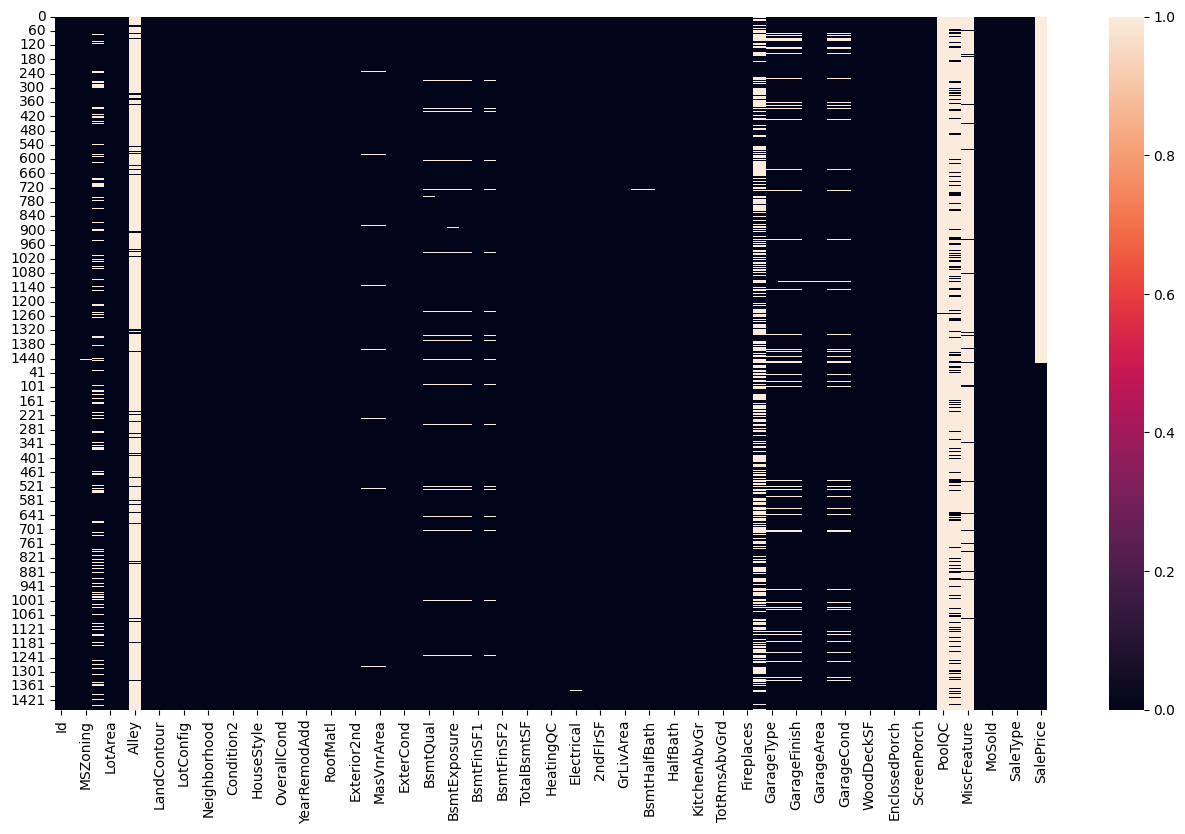

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())        # we'll make a new dataframe and fill it as.. where we have value, 'false'. where we have null value, 'true'.
plt.savefig("/content/drive/MyDrive/house-prices-advanced-regression-techniques/EDA_img/heatmap_DF_of_null_values.png")

### Get the null value percentage for every feature

In [ ]:
# set index as ID column
data = data.set_index("Id")

In [ ]:
null_count = data.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [ ]:
null_percentage = data.isnull().sum()/data.shape[0] * 100
null_percentage

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

### Drop Columns/Features

As per observation, we will not drop any feature from dataset

#### k-means / naive-bayes <br/>
(there is no specific threshold value, it depends on our domain knowledge wether we'll drop the feature or implace new value. threshold value depends on data and project)

In [ ]:
"""As per domain knowledge we will not drop those features, instead None value will add constant value 'NA' """
miss_value_50_perc = null_percentage[null_percentage > 50]
miss_value_50_perc

""" here we saw that the 'None' for the followings are not actually 'missing' but that the 'feature is absent in the house'
'NA' is constant, our ML can't understand what is 'none' so we impute 'NA' constant there"""

" here we saw that the 'None' for the followings are not actually 'missing' but that the 'feature is absent in the house'\n'NA' is constant, our ML can't understand what is 'none' so we impute 'NA' constant there"

we will not drop these columns since, the 'NA' values of them mean.. no fence or alley or etc. available at that house, and not null. that's why you gotta check those values before making the decision of removing it.

In [ ]:
"""As per domain knowledge we will not drop FireplaceQu feature, instead None value will add constant value 'NA' """
miss_value_20_50_perc = null_percentage[(null_percentage > 20) & (null_percentage < 50)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [ ]:
"""As per domain knowledge we will not drop FireplaceQu feature, instead None value will add constant value 'NA' """
miss_value_5_20_perc = null_percentage[(null_percentage > 5) & (null_percentage < 20)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [ ]:
data["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: ylabel='Id'>

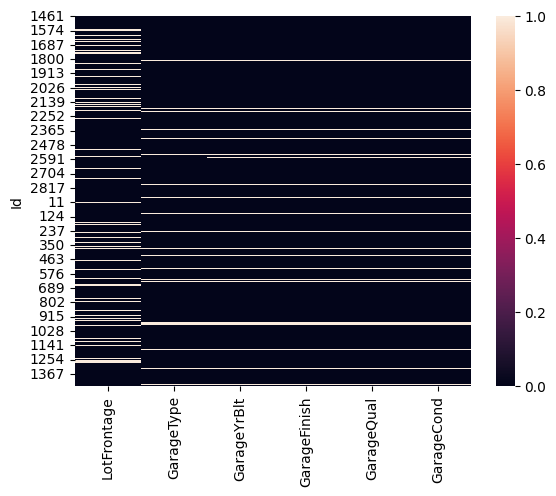

In [ ]:
sns.heatmap(data[miss_value_5_20_perc.keys()].isnull())

## Missing Value Imputation

In [ ]:
missing_value_features = null_percentage[null_percentage > 0]
print("Total missing value features = ", len(missing_value_features))

Total missing value features =  35


In [ ]:
missing_value_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

let's see in how many we have categorical values and in how many.. numerical

In [ ]:
cat_na_feat = missing_value_features[missing_value_features.keys().isin(catagorical_features)]
print("Total number of catagorical missing features = ", len(cat_na_feat))

Total number of catagorical missing features =  23


In [ ]:
cat_na_feat

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [ ]:
int_na_feat = missing_value_features[missing_value_features.keys().isin(int_features)]
print("Total number of integer missing features = ", len(int_na_feat))
int_na_feat

Total number of integer missing features =  0


Series([], dtype: float64)

In [ ]:
float_na_feat = missing_value_features[missing_value_features.keys().isin(float_features)]
print("Total number of float missing features = ", len(float_na_feat))
float_na_feat

Total number of float missing features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [ ]:
num_na_feat = missing_value_features[missing_value_features.keys().isin(int_features) + missing_value_features.keys().isin(float_features)]
print("Total number of numerical missing features = ", len(num_na_feat))
num_na_feat

Total number of numerical missing features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### handling MSZoning    =     0.137033

In [ ]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

- if the distribution is bell curve, then mean median and mode are approx. same.. so, we'll impute 'mean' value
- if the distribution is right skewed/left skewed, (mean value is biased upon outlier (runs after), and not median.. it goes to majority (i.e., frequency)), then we use median.

- when we have categorical data, we use 'mode' value.. because there we focus of frequency. We impute the class whose frequency is the most.
- for numerical, we can use any.. mean, median, mode, and even a constant.
- But when we talk about central tendency (like here), we use either mean or median.

<Axes: xlabel='count', ylabel='MSZoning'>

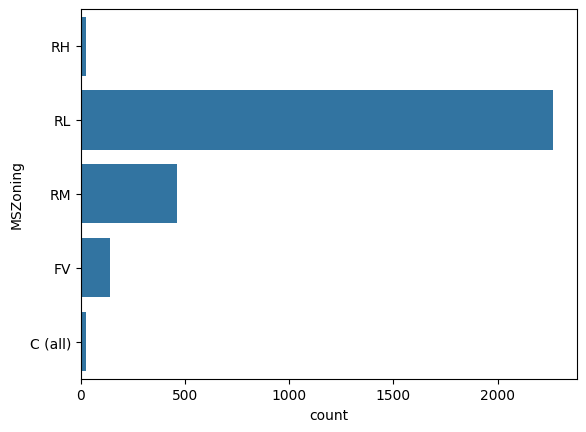

In [ ]:
sns.countplot(data['MSZoning'])

this data is right skewed, but our data is categorical. So, we'll use.. mode to impute missing values.

### backup of original data
we do not want to tamper the original data

In [ ]:
df_mvi = data.copy()
df_mvi.shape        # mvi means, missing value impute

(2919, 80)

In [ ]:
mszonin_mode = data['MSZoning'].mode()[0]         # [0]th is RL, RL is mode.. storing it to use it for imputation
mszonin_mode
# mode because its one feature's value was too much, which is RL

'RL'

In [ ]:
df_mvi['MSZoning'].replace(np.nan, mszonin_mode, inplace=True)          # nan value inplacing with mode value
df_mvi['MSZoning'].isnull().sum()                      #  checking

0

<Axes: xlabel='count', ylabel='MSZoning'>

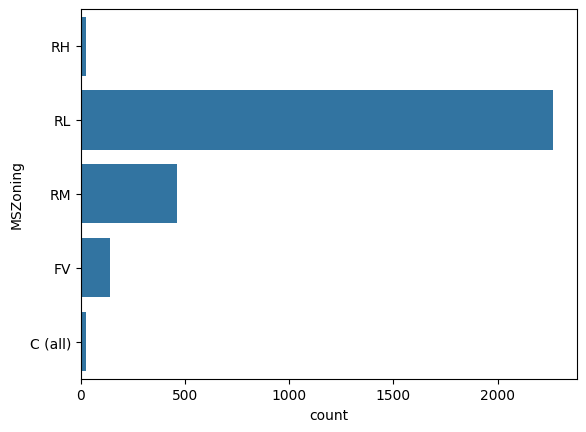

In [ ]:
sns.countplot(data['MSZoning'])

In [ ]:
def old_new_count_plot(df, df_new, feature):
  plt.subplot(121)
  sns.countplot(df[feature])
  plt.title('Old data distribution')
  plt.subplot(122)
  sns.countplot(df_new[feature])
  plt.title('New data distribution')

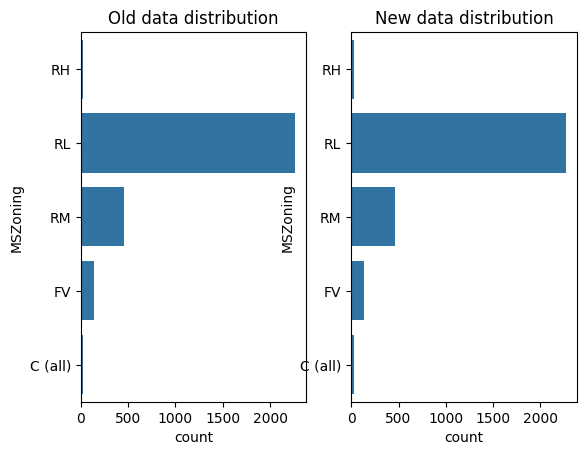

In [ ]:
old_new_count_plot(data, df_mvi, 'MSZoning')

### handling Alley = 93.216855

In [ ]:
df_mvi['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [ ]:
Alley_const = "NA"
df_mvi['Alley'].replace(np.nan, Alley_const, inplace=True)
df_mvi['Alley'].isnull().sum()
# we imputing 'NA' string, it was 'none=not a number'

0

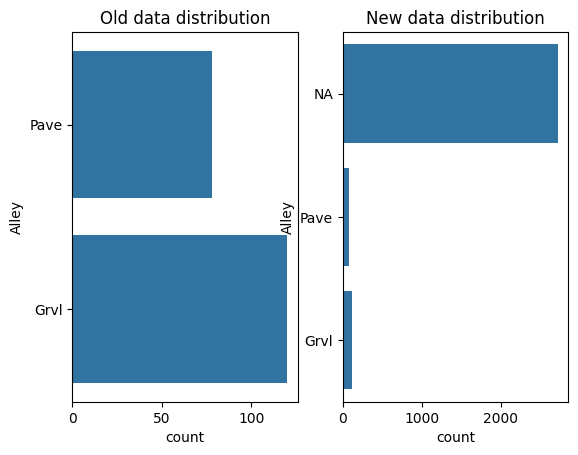

In [ ]:
# see the distribution
old_new_count_plot(data, df_mvi, 'Alley')

### handling LotFrontage = 16.649538

In [ ]:
def boxHistPlot(df, figsize=(16, 5)):
  plt.figure(figsize=figsize)
  plt.subplot(121)
  sns.boxplot(df)
  plt.subplot(122)
  # sns.histplot(df)
  sns.distplot(df)

<ipython-input-42-995f7628c777>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


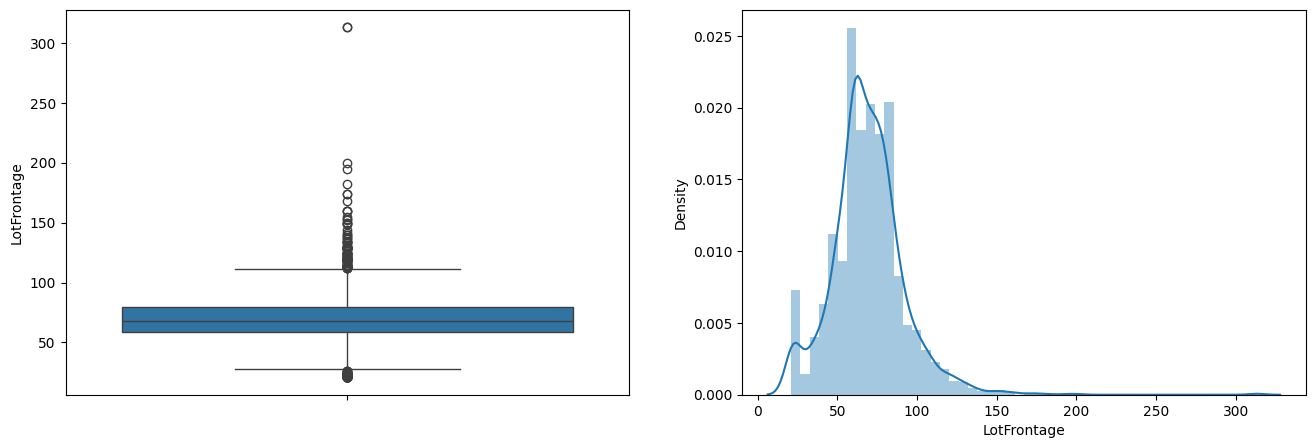

In [ ]:
boxHistPlot(data['LotFrontage'])

these dots in box graph represent outliars. The 2 limit-lines are min. and max. 1% and 100% beyond them lies outliars.

it is a little right skewed, the.. distplot(). so we'll take median value for implacement. We can also understand this by seeing boxplot(). There are so many outliars

In [ ]:
lot_Frontage_med = data['LotFrontage'].median()
df_mvi['LotFrontage'].replace(np.nan, lot_Frontage_med, inplace=True)
df_mvi['LotFrontage'].isnull().sum()

0

In [ ]:
def old_new_box_hist_plot(df, df_new, feature, figsize=(16,10)):
  plt.figure(figsize=figsize)

  plt.subplot(221)
  sns.boxplot(df[feature])
  plt.title('Old data distribution')
  plt.subplot(222)
  sns.distplot(df[feature])
  plt.title('Old data distribution')

  plt.subplot(223)
  sns.boxplot(df_new[feature])
  plt.title('New data distribution')
  plt.subplot(224)
  sns.distplot(df_new[feature])
  plt.title('New data distribution')

<ipython-input-45-6fedda3f8eae>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-45-6fedda3f8eae>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


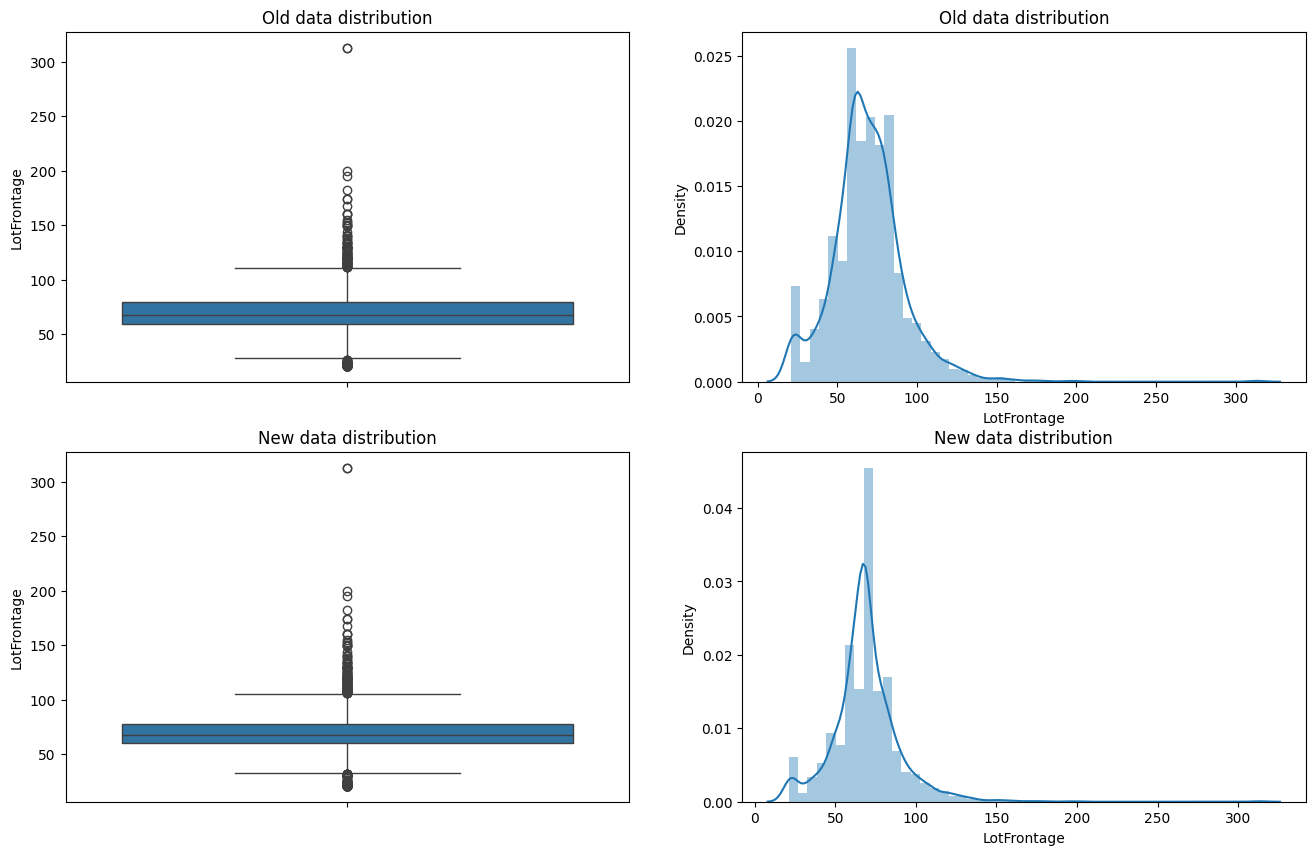

In [ ]:
old_new_box_hist_plot(data, df_mvi, 'LotFrontage')

### handling Utilities  =  0.068517

In [ ]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
# here all 2916 houses have AllPub, so we'll impute.. this value only
utilities_mode = data['Utilities'].mode()[0]
df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace=True)
df_mvi['Utilities'].isnull().sum()

0

### handling Exterior1st = 0.034258 and Exterior2nd = 0.034258

In [ ]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [ ]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [ ]:
# multiple categories so mode value impute
ext1_mode = data['Exterior1st'].mode()[0]
df_mvi['Exterior1st'].replace(np.nan, ext1_mode, inplace=True)
df_mvi['Exterior1st'].isnull().sum()

0

In [ ]:
ext2_mode = data['Exterior2nd'].mode()[0]
df_mvi['Exterior2nd'].replace(np.nan, ext2_mode, inplace=True)
df_mvi['Exterior2nd'].isnull().sum()

0

In [ ]:
data['Exterior2nd'].mode()[0]

'VinylSd'

In [ ]:
data['Exterior1st'].mode()[0]

'VinylSd'

### handling MasVnrType = 0.822199 and MasVnrArea = 0.787941

<Axes: ylabel='Id'>

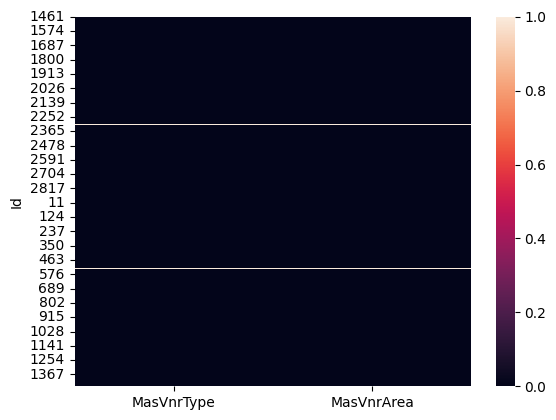

In [ ]:
# since they seem to have similar missing value %, means they might have similar pattern of missing values. we'll use heatmap for it 'sns'
sns.heatmap(data[['MasVnrType', 'MasVnrArea']].isnull())
# for none MasVnrtype, there will be no area obviously..

In [ ]:
data[data[['MasVnrType', 'MasVnrArea']].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
1707,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial,NaN
1883,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,NaN
1993,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,NaN
2005,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,NaN
2042,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,NaN
2312,60,RL,59.0,15810,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial,NaN
2326,80,RL,NaN,11950,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,NaN
2341,20,RL,85.0,9965,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial,NaN


In [ ]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [ ]:
data['MasVnrArea'].value_counts()

0.0       1738
120.0       15
200.0       13
176.0       13
216.0       12
180.0       12
108.0       11
144.0       11
72.0        11
16.0        11
340.0       10
196.0        9
128.0        9
80.0         9
210.0        9
178.0        8
132.0        8
40.0         8
256.0        8
170.0        8
302.0        8
203.0        7
76.0         7
320.0        7
186.0        7
420.0        7
44.0         7
140.0        7
260.0        7
164.0        7
252.0        7
60.0         7
300.0        7
270.0        7
456.0        7
174.0        7
240.0        7
50.0         7
360.0        7
106.0        7
84.0         7
306.0        6
504.0        6
198.0        6
232.0        6
112.0        6
90.0         6
145.0        6
130.0        6
288.0        6
246.0        6
143.0        6
513.0        5
168.0        5
194.0        5
182.0        5
136.0        5
82.0         5
206.0        5
272.0        5
148.0        5
98.0         5
68.0         5
88.0         5
100.0        5
160.0        5
268.0     

In [ ]:
masvnrtype_mode = data['MasVnrType'].mode()[0]
df_mvi['MasVnrType'].replace(np.nan, masvnrtype_mode, inplace=True)
df_mvi['MasVnrType'].isnull().sum()

0

<ipython-input-42-995f7628c777>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


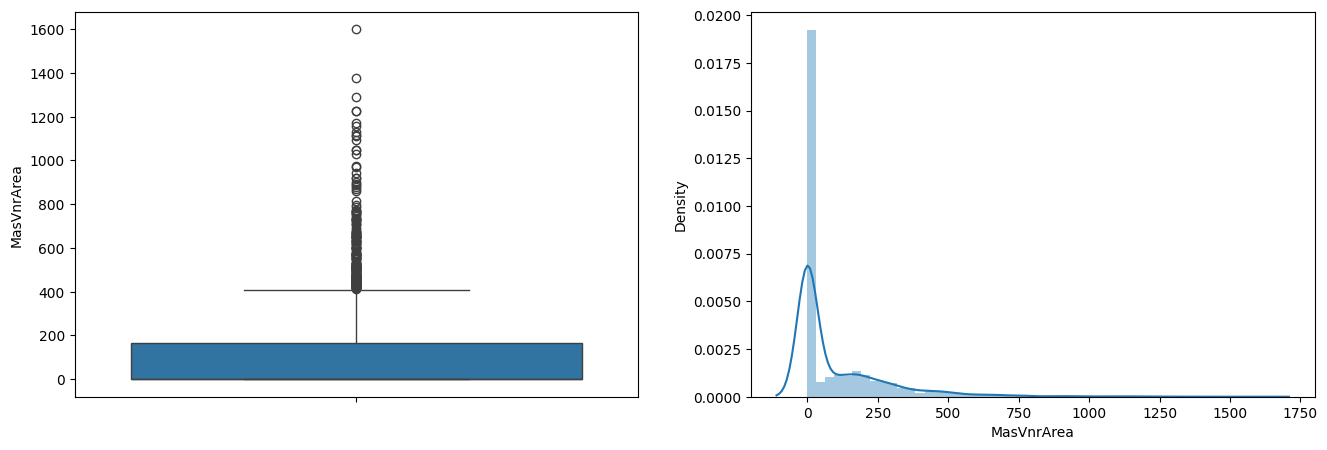

In [ ]:
# we don't know what to inplace so we'll see first the distribution
boxHistPlot(data['MasVnrArea'])

In [ ]:
# it is left skewed distribution, 50% data is 0, so if wew impute 0.. it will be fine :)
masvnrarea_cnst = 0
df_mvi['MasVnrType'].replace(np.nan, masvnrarea_cnst, inplace=True)
df_mvi['MasVnrType'].isnull().sum()
# missing value of type is none, means nothing here.. so no area.. so zero area value

0

### handling Bsmt features

cat_bsmt_feat =  <br/>
- BsmtQual         2.774923 <br/>
- BsmtCond         2.809181 <br/>
- BsmtExposure     2.809181 <br/>
- BsmtFinType1     2.706406 <br/>
- BsmtFinType2     2.740665 <br/>
 <br/>
num_bsmt_feat =  <br/>
- BsmtFinSF1       0.034258 <br/>
- BsmtFinSF2       0.034258 <br/>
- BsmtUnfSF        0.034258 <br/>
- TotalBsmtSF      0.034258 <br/>
- BsmtFullBath     0.068517 <br/>
- BsmtHalfBath     0.068517 <br/>

In [ ]:
cat_bsmt_feat = ["BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2" ]

num_bsmt_feat = ["BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath" ]

<Axes: ylabel='Id'>

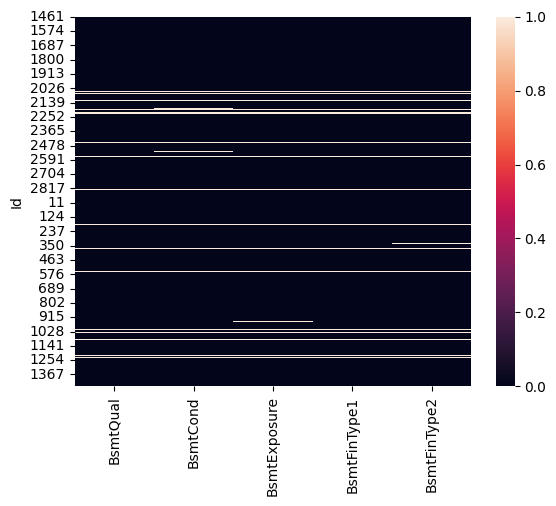

In [ ]:
sns.heatmap(data[cat_bsmt_feat].isnull())

In [ ]:
for feat in cat_bsmt_feat:
  print(f"Value count of {feat}: {data[feat].value_counts()}\n")

Value count of BsmtQual: TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

Value count of BsmtCond: TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

Value count of BsmtExposure: No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

Value count of BsmtFinType1: Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

Value count of BsmtFinType2: Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64



In [ ]:
bsmt_const = 'NA'
for feat in cat_bsmt_feat:
  df_mvi[feat].replace(np.nan, bsmt_const, inplace=True)

In [ ]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

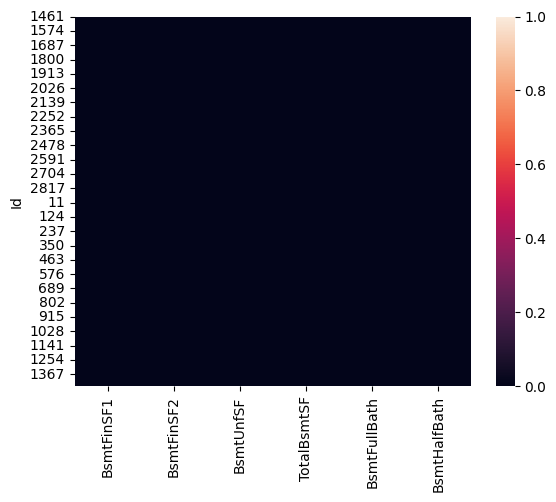

In [ ]:
sns.heatmap(data[num_bsmt_feat].isnull())

In [ ]:
df_bsmt = data[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
1488,Gd,TA,NaN,Unf,Unf,0.0,0.0,1595.0,1595.0,0.0,0.0
1586,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1594,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1730,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1779,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1815,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1848,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1849,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1857,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


we should have taken frequency value i\to impute in few of the features, but anyway.. little bit here and there is okay.

In [ ]:
bsmt_num = 0
for feat in num_bsmt_feat:
  df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)

In [ ]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### handling Electrical = 0.034258 and KitchenQual = 0.034258

<Axes: ylabel='Id'>

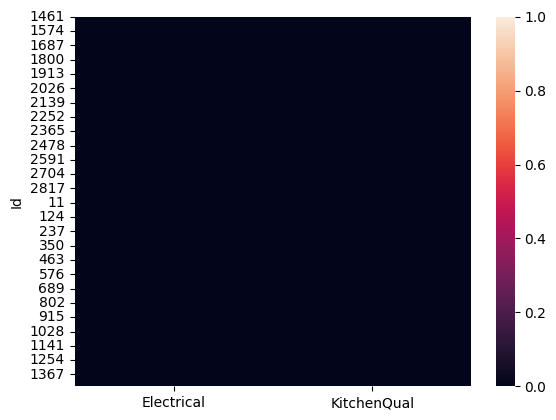

In [ ]:
sns.heatmap(data[['Electrical', 'KitchenQual']].isnull())

In [ ]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [ ]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [ ]:
df_ekk = data[['Electrical', 'KitchenQual', 'KitchenAbvGr']]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1556,SBrkr,NaN,1
1380,NaN,Gd,1


not much value missing, so use mode

In [ ]:
elec_mode = data['Electrical'].mode()[0]
df_mvi['Electrical'].replace(np.nan, elec_mode, inplace=True)
df_mvi['Electrical'].isnull().sum()

0

In [ ]:
kq_mode = data['KitchenQual'].mode()[0]
df_mvi['KitchenQual'].replace(np.nan, kq_mode, inplace=True)
df_mvi['KitchenQual'].isnull().sum()

0

### handling remaining categorial(cat) features
- Functional       0.068517   mode(cause all values)
- FireplaceQu     48.646797   'NA'(cause, none)

- PoolQC          99.657417   'NA'
- Fence           80.438506   'NA'
- MiscFeature     96.402878   'NA'
- SaleType         0.034258   mode
- ~SalePrice       49.982871~


In [ ]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [ ]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [ ]:
f_mode = data['Functional'].mode()[0]
df_mvi['Functional'].replace(np.nan, f_mode, inplace=True)
df_mvi['Functional'].isnull().sum()

0

In [ ]:
sale_type_mode = data['SaleType'].mode()[0]
df_mvi['SaleType'].replace(np.nan, sale_type_mode, inplace=True)
df_mvi['SaleType'].isnull().sum()

0

In [ ]:
cat_na_feat = ["Functional",
"FireplaceQu",
"PoolQC",
"Fence",
"MiscFeature"]

In [ ]:
for feat in cat_na_feat:
  print(f"Value count of {feat}: {data[feat].value_counts()}\n")

Value count of Functional: Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

Value count of FireplaceQu: Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

Value count of PoolQC: Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

Value count of Fence: MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

Value count of MiscFeature: Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64



In [ ]:
rest_cat_const = 'NA'
for feat in cat_na_feat:
  df_mvi[feat].replace(np.nan, rest_cat_const, inplace=True)

In [ ]:
df_mvi[cat_na_feat].isnull().sum()

Functional     0
FireplaceQu    0
PoolQC         0
Fence          0
MiscFeature    0
dtype: int64

### handling garage features
catagorical: all 'NA'
- GarageType       5.378554
- GarageFinish     5.447071
- GarageQual       5.447071
- GarageCond       5.447071<br/><br/>

numerical: all '0'
- GarageYrBlt      5.447071
- GarageCars       0.034258
- GarageArea       0.034258

In [ ]:
cat_garg_feat = [ "GarageType",
"GarageFinish",
"GarageQual",
"GarageCond" ]

num_garg_feat = [ "GarageYrBlt",
"GarageCars",
"GarageArea" ]

<Axes: ylabel='Id'>

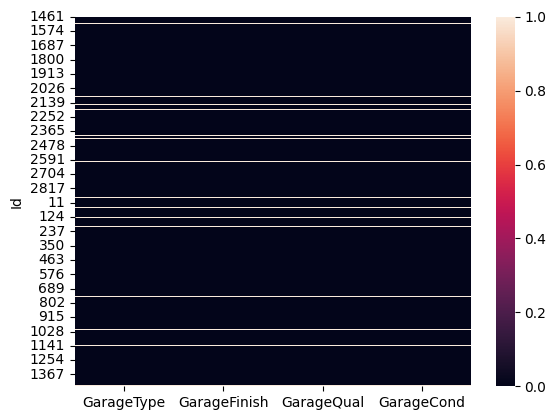

In [ ]:
sns.heatmap(data[cat_garg_feat].isnull())

In [ ]:
for feat in cat_garg_feat:
  print(f"Value count of {feat}: {data[feat].value_counts()}\n")

Value count of GarageType: Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

Value count of GarageFinish: Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

Value count of GarageQual: TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

Value count of GarageCond: TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64



In [ ]:
cat_na_gar = 'NA'
for feat in cat_garg_feat:
  df_mvi[feat].replace(np.nan, cat_na_gar, inplace=True)

In [ ]:
df_mvi[cat_garg_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

<Axes: ylabel='Id'>

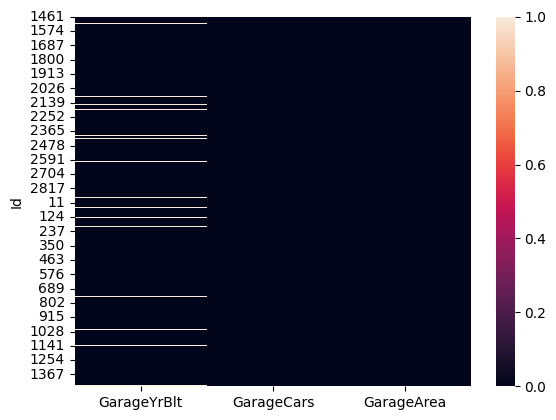

In [ ]:
sns.heatmap(data[num_garg_feat].isnull())

In [ ]:
num_na_gar = 'NA'
for feat in num_garg_feat:
  df_mvi[feat].replace(np.nan, num_na_gar, inplace=True)

In [ ]:
df_mvi[num_garg_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [ ]:
df_garrage = data[num_garg_feat + cat_garg_feat]
df_garrage[df_garrage.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
1514,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1532,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1540,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1553,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1557,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1559,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1561,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1591,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1594,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df_mvi.isnull().any(axis=1).sum()
# this is showing the missing value in 'SalesPrice' and not in our data

1467

## Feature Transformation

### Convert Numerical Feature to Categorical Feature

In [ ]:
# like.. for classification, string is used, and number is count of that classification
feat_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]

# know the data type
for feat in feat_num_conv:
  print(f"{feat}: data type = {df_mvi[feat].dtype}")

# for ex, in 'MSSubClass', the catagories/classes in this feature were represented by numerical value, so we need to convert them into string
# considering/converting them all catgegorical features

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = object
MoSold: data type = int64
YrSold: data type = int64


In [ ]:
df_mvi[feat_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1461,20,1961,1961,1961.0,6,2010
1462,20,1958,1958,1958.0,6,2010
1463,60,1997,1998,1997.0,3,2010
1464,60,1998,1998,1998.0,6,2010
1465,120,1992,1992,1992.0,1,2010


In [ ]:
df_mvi["MoSold"].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [ ]:
# all in 12, means yes we can convert them into january februart\y etc.
df_mvi["MoSold"].unique()
# between 1-12 we have uniquie value.. to conver it into jan, feb string.. we'll use calendar library

array([ 6,  3,  1,  4,  5,  2,  7, 10,  8, 11,  9, 12])

### calendar use

In [ ]:
calendar.month_abbr[5]

'May'

### lambda function

example use

In [ ]:
cube = lambda x: x**3
print(cube(3))  # Output: 27

27


example use

In [ ]:
my_list = [1, 5, 4, 6, 8, 11, 3, 12]
new_list = list(filter(lambda x: (x%2 == 0), my_list))
print(new_list)  # Output: [4, 6, 8, 12]

[4, 6, 8, 12]


real use

In [ ]:
df_mvi['MoSold'] = df_mvi['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [ ]:
df_mvi['MoSold'].unique()

array(['Jun', 'Mar', 'Jan', 'Apr', 'May', 'Feb', 'Jul', 'Oct', 'Aug',
       'Nov', 'Sep', 'Dec'], dtype=object)

In [ ]:
df_mvi["MoSold"].value_counts()

Jun    503
Jul    446
May    394
Apr    279
Aug    233
Mar    232
Oct    173
Sep    158
Nov    142
Feb    133
Jan    122
Dec    104
Name: MoSold, dtype: int64

In [ ]:
df_mvi["GarageYrBlt"].value_counts()

NA        159
2005.0    142
2007.0    115
2006.0    115
2004.0     99
2003.0     92
1977.0     66
2008.0     61
1998.0     58
2000.0     55
1999.0     54
2002.0     53
1950.0     51
1976.0     50
1993.0     49
1968.0     48
1997.0     44
1958.0     42
1978.0     41
1956.0     41
2001.0     41
1996.0     40
1966.0     39
1994.0     39
1960.0     37
1954.0     37
1967.0     36
1959.0     36
1995.0     35
1979.0     35
1964.0     35
1962.0     35
1974.0     35
1957.0     34
1965.0     34
1963.0     34
1920.0     33
1980.0     32
1970.0     32
1969.0     32
1961.0     31
1973.0     29
2009.0     29
1975.0     28
1930.0     27
1972.0     27
1992.0     27
1990.0     26
1940.0     25
1971.0     24
1955.0     24
1953.0     23
1939.0     21
1988.0     20
1989.0     19
1948.0     19
1984.0     19
1985.0     18
1987.0     18
1951.0     17
1991.0     17
1952.0     16
1925.0     15
1981.0     15
1926.0     15
1949.0     14
1941.0     14
1986.0     12
1983.0     11
1938.0     11
1910.0     10
1945.0

In [ ]:
for feat in feat_num_conv:
  df_mvi[feat]= df_mvi[feat].astype(str)

In [ ]:
for feat in feat_num_conv:
  print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


ML models work on numerical data, and not categorical.. so yeah..

## Convert Categorical Feature to Numerical Feature



#### Ordinal Encoding

In [ ]:
ordinal_end_var = {
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities"
}

print("Total number of features to convert ordinal numerical format: ", len(ordinal_end_var))

Total number of features to convert ordinal numerical format:  18


In [ ]:
df_mvi['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [ ]:
df_mvi['ExterQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [ ]:
# CategoricalDtype

df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes


In [ ]:
df_mvi['ExterQual'].value_counts()

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [ ]:
df_mvi['ExterQual'].unique()

array([2, 3, 4, 1], dtype=int8)

In [ ]:
df_mvi['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [ ]:
df_mvi['BsmtExposure'] = df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"], ordered=True)).cat.codes

In [ ]:
df_mvi['BsmtExposure'].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [ ]:
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], ordered=True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered=True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=["N", "P", "Y"], ordered=True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=["ELO", "NoSeWa", "NoSewr", "AllPub"], ordered=True)).cat.codes

In [ ]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1461 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearB

### One Hot Encoding for Nominal Categorical Data

In [ ]:
# Encoding: ordered(ordered priority)/un-ordered(random-priority)/no-priority(0/1)
df_encode = df_mvi.copy()

object_features = df_encode.select_dtypes(include="object").columns.tolist()
print("Total object data type features: ", len(object_features))

print("\nFeatures: \n", object_features)

Total object data type features:  34

Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [ ]:
df_encode[object_features].head(2)
# even the numeric ones are also categorical

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,GarageCars,GarageArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,Pave,NA,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,SBrkr,Attchd,1961.0,1.0,730.0,MnPrv,NA,Jun,2010,WD,Normal
1462,20,RL,Pave,NA,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,SBrkr,Attchd,1958.0,1.0,312.0,NA,Gar2,Jun,2010,WD,Normal


In [ ]:
df_encode['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [ ]:
pd.get_dummies(df_encode['MSZoning'], columns='MSZoning', prefix='MSZoning', drop_first=False)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,
1461,0,0,1,0,0
1462,0,0,0,1,0
1463,0,0,0,1,0
1464,0,0,0,1,0
1465,0,0,0,1,0
1466,0,0,0,1,0
1467,0,0,0,1,0
1468,0,0,0,1,0
1469,0,0,0,1,0


In [ ]:
pd.get_dummies(df_encode['MSZoning'], columns='MSZoning', prefix='MSZoning', drop_first=True)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,
1461,0,1,0,0
1462,0,0,1,0
1463,0,0,1,0
1464,0,0,1,0
1465,0,0,1,0
1466,0,0,1,0
1467,0,0,1,0
1468,0,0,1,0
1469,0,0,1,0


In [ ]:
# pd.get_dummies(): this function can be used to convert categorical data to numric
print("Shape of DF before encoding: ", df_encode.shape)
df_encode = pd.get_dummies(df_encode, columns=object_features, prefix=object_features, drop_first=True)
print("Shape of DF after encoding: ", df_encode.shape)

Shape of DF before encoding:  (2919, 80)
Shape of DF after encoding:  (2919, 1120)


In [ ]:
df_encode.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,Y

In [ ]:
df_encode.select_dtypes(include='object').columns.tolist()
# output: [] ==> null, means no datatype is object

[]

## Split Data for Training and Testing

In [ ]:
df_encode.shape


# Shape of test data:  (1459, 80)
# Shape of train data:  (1460, 81)


(2919, 1120)

In [ ]:
len_train = train_data.shape[0]
len_train

1460

In [ ]:
X_train = df_encode[:len_train].drop('SalePrice', axis=1)         # axis=1 means we gotta remove this
Y_train = df_encode['SalePrice'][:len_train]

X_test = df_encode[len_train:].drop('SalePrice', axis=1)
# we're not taking Y_test because it consists of null values


print("Shape of X_train data: ", X_train.shape)
print("Shape of Y_train data: ", Y_train.shape)
print("Shape of X_test data: ", X_test.shape)

Shape of X_train data:  (1460, 1119)
Shape of Y_train data:  (1460,)
Shape of X_test data:  (1459, 1119)


## Feature Scaling

In [ ]:
# There are many types for it.. we chose on the basis of domain knowledge
# scaling type: robust, standard, min-max, normalization

# StandardScaler()--> class ... sc: object
sc = StandardScaler()
sc.fit(X_train)         # from it, we'll extracts/learns mean and standard deviation values for the feature/s
# we'll scale using it, all the X points/values
# formual: z = (x-u)/s, u: mean, s: standard deviation

# apply what you learnt in .fit()
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
# now the data is converted into 'standard-scalar'

In [ ]:
# now you'll not get data in dataframe but numpy arrays
X_train[:3,:]

array([[ 0.56025375,  0.36423366,  0.        , ..., -0.13465178,
         0.46001984, -0.2992528 ],
       [ 0.6089193 ,  0.89833416,  0.        , ..., -0.13465178,
         0.46001984, -0.2992528 ],
       [ 0.26826048,  0.81009147,  0.        , ..., -0.13465178,
         0.46001984, -0.2992528 ]])

In [ ]:
X_test[:3,:]

array([[ 0.56025375, -0.04406547,  0.        , ..., -0.13465178,
         0.46001984, -0.2992528 ],
       [-0.02373279,  0.28911632,  0.        , ..., -0.13465178,
         0.46001984, -0.2992528 ],
       [-0.41305714, -0.05416189,  0.        , ..., -0.13465178,
        -2.17381926, -0.2992528 ]])

now the data are scaled. let's see their mean and standard deviation values

### Carry forward for deployment

- sc.mean_    (# you'll get mean for each and every feature)
- sc.mean_.shape  (# for how many columns did we get mean??)
- sc.feature_names_in_
- sc.n_features_in_
- sc.n_samples_seen_
- sc.scale_     (# scale value)
- sc.var_       (# variable values)
- sc.with_mean
- sc.with_std

you'll know which scaling method is right for your dataset, after training and testing the accuracy by each scaling technique

next the ML that we use for Regression. You can use any model.<br/>
Rn our dataset is not telling us which model are we supposed to train.<br/> So, you take all the models available in today's date.. and train that model,
and then see which model gives you best accuracy. <br/>Then choose that model, and Fine Tune it.. and then select that model for deployment

- We have regression problem.
- The house price we'll predict will be continious value, so regression ML.
- Supervized because, we already have labelled data.
- We're using regression supervised learning to predict house price.
- accuracy max. achieving.

[we have many regression models, so we need to see which type of data we have. Weak learner ka use karke, strong learner banega and humare problem ko solve karega]

- can use the link 🔗: https://scikit-learn.org/stable/ to see for all the possible alogorithms/models and how to use them.

## Train ML Model

In [ ]:
# classes imported for regression, to check which is the best fit for our data to give best accuracy
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [ ]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr =  DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

mlpr =  MLPRegressor()
ir = IsotonicRegression()

In [ ]:
models = {
    "a": ["LinearRegression", lr],
    "b": ["SVR", svr],
    "c": ["SGDRegressor", sgdr],
    "d": ["KNeighborsRegressor", knr],
    "e": ["GaussianProcessRegressor", gpr],
    "f": ["DecisionTreeRegressor", dtr],
    "g": ["GradientBoostingRegressor", gbr],
    "h": ["RandomForestRegressor", rfr],
    "i": ["XGBRegressor", xgbr],
    "j": ["MLPRegressor", mlpr],
    "k": ["IsotonicRegression", ir]
}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# we'll do this for each model
def test_model(model, X_train=X_train, Y_train=Y_train):
  # KFold, n_splits's value is split of value in 7 parts (n parts for n value)
  # then each time 1 part as test and others as training.. all this 7 times, each time taking other one as test and rest for training
  cv = KFold(n_splits = 7, shuffle=True, random_state = 45)
  r2 = make_scorer(r2_score)          # gives evaluation matrix, r^2=r2:evaluation matrix
  r2_val_score = cross_val_score(model, X_train, Y_train, cv=cv, scoring = r2)          # we'll get 7 time scores
  score = [r2_val_score.mean()]               # we'll take the mean of those scores
  return score

# who-ever gives max. score value, will be chosen
# here it is training but is not returning trained model, but score of the trained model. we'll train later

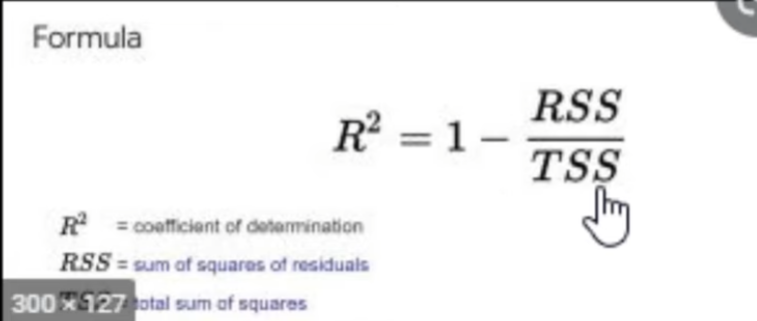

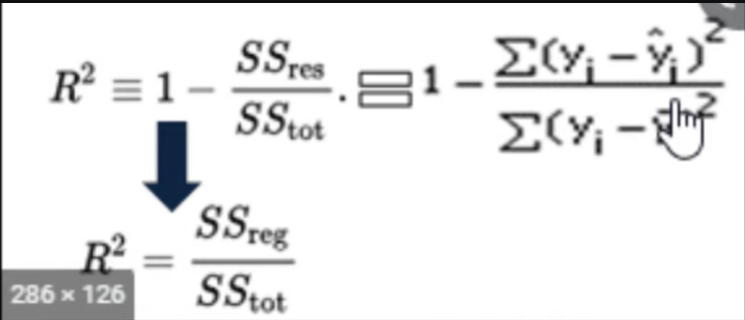

this will give either +ve or -ve value. <br/>Max. +ve: 1 <br/> Max. -ve: any <br/>
more towards 1, more better model
<br/>
We use R-model to evaluate model


In [ ]:
models_score = []
for model in models:
  print("Training model: ", models[model][0])
  score = test_model(models[model][1], X_train, Y_train)
  print("Score of model: ", score)
  models_score.append([models[model][0], score[0]])

Training model:  LinearRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 648, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
import numpy as np

# Check the data type of X_train
print("Data type of X_train:", X_train.dtype)

# Check if any element has the 'object' data type in X_train
if np.issubdtype(X_train.dtype, object):
    print("X_train contains elements with 'object' data type.")
else:
    print("No elements with 'object' data type in X_train.")


Data type of X_train: float64
No elements with 'object' data type in X_train.


In [ ]:
# Check the data type of Y_train
print("Data type of Y_train:", Y_train.dtype)

# Check if any element has the 'object' data type in Y_train
if np.issubdtype(Y_train.dtype, object):
    print("Y_train contains elements with 'object' data type.")
else:
    print("No elements with 'object' data type in Y_train.")

Data type of Y_train: float64
No elements with 'object' data type in Y_train.


In [ ]:
# Check the data type of X_test
print("Data type of X_test:", X_test.dtype)

# Check if any element has the 'object' data type in X_test
if np.issubdtype(X_test.dtype, object):
    print("X_test contains elements with 'object' data type.")
else:
    print("No elements with 'object' data type in X_test.")

Data type of X_test: float64
No elements with 'object' data type in X_test.


In [ ]:
import numpy as np

# Check for NaN values in X_train
nan_values = np.isnan(X_train)

# Count the number of NaN values
num_nan_values = np.sum(nan_values)

if num_nan_values > 0:
    print("X_train contains NaN values.")
    print("Number of NaN values:", num_nan_values)
else:
    print("X_train does not contain any NaN values.")


X_train contains NaN values.
Number of NaN values: 15


In [ ]:
import numpy as np

# Check for NaN values in Y_train
nan_values = np.isnan(Y_train)

# Count the number of NaN values
num_nan_values = np.sum(nan_values)

if num_nan_values > 0:
    print("Y_train contains NaN values.")
    print("Number of NaN values:", num_nan_values)
else:
    print("Y_train does not contain any NaN values.")


Y_train contains NaN values.
Number of NaN values: 1459


In [ ]:
import numpy as np

# Check for NaN values in X_test
nan_values = np.isnan(X_test)

# Count the number of NaN values
num_nan_values = np.sum(nan_values)

if num_nan_values > 0:
    print("X_test contains NaN values.")
    print("Number of NaN values:", num_nan_values)
else:
    print("X_test does not contain any NaN values.")


X_test contains NaN values.
Number of NaN values: 8
